In [0]:
import os

In [0]:
os.environ['KAGGLE_USERNAME'] = "XXXXXXXXX"
os.environ['KAGGLE_KEY'] = "XXXXXXXXXXXXXXXXXXXXXXXXXX"

In [0]:
!kaggle competitions download -c ieee-fraud-detection

 84% 44.0M/52.5M [00:01<00:00, 33.3MB/s]
100% 52.5M/52.5M [00:01<00:00, 37.5MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 100MB/s]
 97% 46.0M/47.3M [00:00<00:00, 46.5MB/s]
100% 47.3M/47.3M [00:00<00:00, 57.2MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 99.0MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 161MB/s]


In [0]:
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip
!unzip test_identity.csv.zip
!unzip test_transaction.csv.zip

Archive:  train_identity.csv.zip
  inflating: train_identity.csv      
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train_transaction = pd.read_csv('train_transaction.csv')
test_transaction = pd.read_csv('test_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_identity = pd.read_csv('test_identity.csv')
print('train transaction size:', len(train_transaction))
print('test transaction size:', len(test_transaction))
print('train identity:',len(train_identity))
print('test identity:',len(test_identity))

train transaction size: 590540
test transaction size: 506691
train identity: 144233
test identity: 141907


In [0]:
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
print("train data size :",train.shape)

train data size : (590540, 434)


In [0]:
len(train[train["isFraud"]==1])/len(train)*100

3.4990009144173126

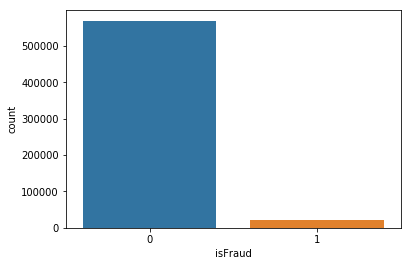

In [0]:
sns.countplot(x='isFraud', data=train)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

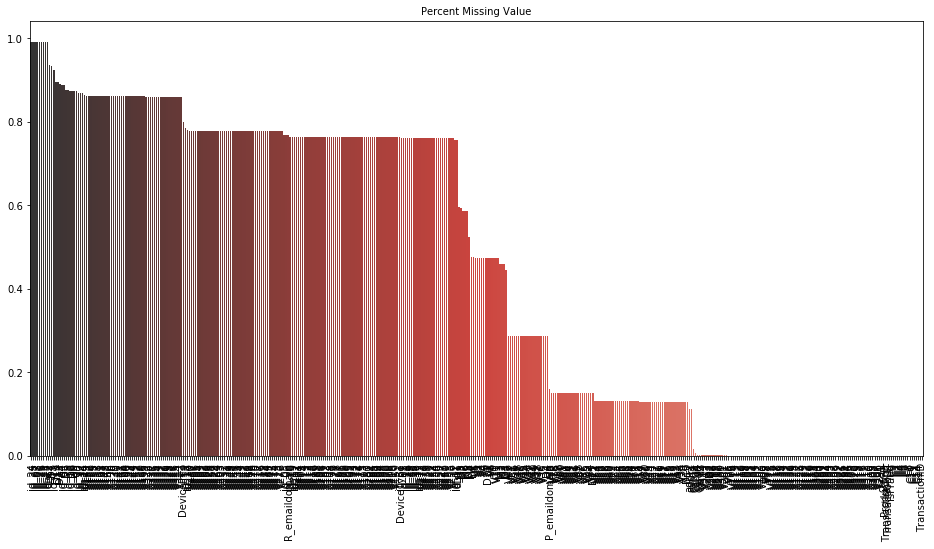

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(y=train.isnull().sum().sort_values(ascending=False)/len(train),
            x=train.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=10)
plt.xticks(rotation=90)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
columns_def=pd.DataFrame({"na_count":train.isnull().sum().sort_values(ascending=False)})

In [0]:
#Create column of percent columns, #higher is worst
columns_def["per"]=columns_def["na_count"]/len(train)

In [0]:
#cycle throungh various limit for percent Na per column
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

In [0]:
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/train.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [0]:
limit=0.10 #only columns w/ less 10% will remain

In [0]:
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 

train=train[train.columns.intersection(columns_final)]

In [0]:
#Show categorical variables
train[train.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [0]:
card6_dummy_df=pd.get_dummies(train["card6"])

In [0]:
train=pd.concat([train,card6_dummy_df],axis=1)

In [0]:
train=train._get_numeric_data()
train=train.dropna()

len(train[train["isFraud"]==1])/len(train)*100

3.46278261170406

In [0]:
x_full_df=train.drop(["isFraud"],axis=1)
y_full_df=train["isFraud"]

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.80)

In [0]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [0]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr.score(X_test, y_test)

0.965440069885312

In [0]:
y_pred=lr.predict(X_test)

In [0]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,446489,446489
1,15983,15983
All,462472,462472


In [0]:
recall_score(y_test, y_pred)

0.0

In [0]:
accuracy_score(y_test, y_pred)

0.965440069885312